In [45]:
import pandas as pd

In [46]:
df = pd.read_csv('./SVM.csv')

In [47]:
df.keys()

Index(['Type', 'Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder',
       'Vanilla', 'Salt'],
      dtype='object')

In [75]:
df

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [49]:
df.shape

(20, 9)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
Type             20 non-null object
Flour            20 non-null int64
Milk             20 non-null int64
Sugar            20 non-null int64
Butter           20 non-null int64
Egg              20 non-null int64
Baking Powder    20 non-null int64
Vanilla          20 non-null int64
Salt             20 non-null int64
dtypes: int64(8), object(1)
memory usage: 1.4+ KB


In [51]:
df.describe()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,43.900000,18.550000,17.100000,11.000000,7.200000,1.300000,0.500000,0.0
std,7.018022,6.801509,7.538672,4.801316,3.019237,0.732695,0.512989,0.0
min,34.000000,0.000000,3.000000,5.000000,4.000000,0.000000,0.000000,0.0
25%,38.000000,15.000000,12.000000,7.000000,5.000000,1.000000,0.000000,0.0
50%,43.500000,17.000000,17.000000,10.000000,6.000000,1.000000,0.500000,0.0
75%,50.000000,24.250000,23.000000,14.250000,9.000000,2.000000,1.000000,0.0
max,55.000000,28.000000,31.000000,20.000000,14.000000,3.000000,1.000000,0.0


In [52]:
x = df['Sugar'].values
y = df['Flour'].values

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

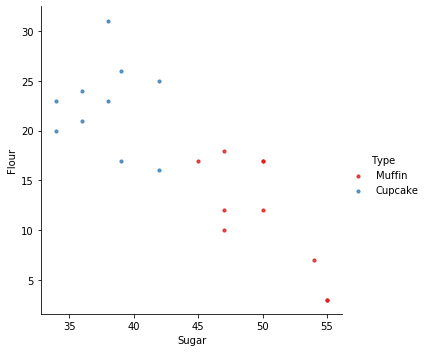

In [54]:
sns.lmplot('Flour', 'Sugar', data = df, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {'s':10})
plt.xlabel('Sugar')
plt.ylabel('Flour')

plt.show()

In [55]:
ingredients = df[['Flour', 'Sugar']]
################################################################
## Type conversion or transform
# Technique 1
type_label = df['Type'].map(
{
    'Muffin':1,
    'Cupcake':0
}
)
# Technique 2
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
d = df.Type
type_encode = encoder.fit_transform(d)
type_encode
#################################################################

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
from sklearn.svm import SVC

In [58]:
model = SVC(kernel = 'linear')

In [59]:
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [88]:
def typePre(Flour, Sugar):    
    pred = model.predict([[Flour, Sugar]])
    t = ''
    if pred[0]==1:
        t = 'Muffin'
        print("It is : ",t)
    else:
        t = 'Cupcake'
        print("It is : ",t)
    

In [89]:
typePre(55,3)

It is :  Muffin


In [90]:
from ipywidgets import interact

In [91]:
interact(typePre, Flour = (0,100), Sugar = (0,100))

interactive(children=(IntSlider(value=50, description='Flour'), IntSlider(value=50, description='Sugar'), Outp…

<function __main__.typePre(Flour, Sugar)>